In [10]:
# Author: Benjamin Reddy

library(plyr)

require(gdata)

# the line of code below
bk <- read.xls("/kaggle/input/master-dataset/Datasets/dds_ch2_rollingsales/rollingsales_brooklyn.xls",pattern="BOROUGH")
# has been edited by Noe
# to run Ben's program

head(bk)
summary(bk)

,BOROUGH,NEIGHBORHOOD,BUILDING.CLASS.CATEGORY,TAX.CLASS.AT.PRESENT,BLOCK,LOT,EASE.MENT,BUILDING.CLASS.AT.PRESENT,ADDRESS,APART.MENT.NUMBER,⋯,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,TAX.CLASS.AT.TIME.OF.SALE,BUILDING.CLASS.AT.TIME.OF.SALE,SALE.PRICE,SALE.DATE
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,NA,,342 53RD STREET,,⋯,0,0,0,0,0,0,2,R1,"$403,572",2013-07-09
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,NA,,342 53RD STREET,,⋯,0,0,0,0,0,0,2,R1,"$218,010",2013-07-12
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,NA,,290 GREENE AVE,,⋯,0,0,0,0,0,0,2,R1,"$952,311",2013-04-25
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,NA,,290 GREENE AVE,,⋯,0,0,0,0,0,0,2,R1,"$842,692",2013-04-25
5,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,NA,,290 GREENE AVE,,⋯,0,0,0,0,0,0,2,R1,"$815,288",2013-04-25
6,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1404,NA,,290 GREENE AVE,,⋯,0,0,0,0,0,0,2,R1,"$815,288",2013-04-25


    BOROUGH  NEIGHBORHOOD       BUILDING.CLASS.CATEGORY TAX.CLASS.AT.PRESENT
 Min.   :3   Length:23373       Length:23373            Length:23373        
 1st Qu.:3   Class :character   Class :character        Class :character    
 Median :3   Mode  :character   Mode  :character        Mode  :character    
 Mean   :3                                                                  
 3rd Qu.:3                                                                  
 Max.   :3                                                                  
     BLOCK           LOT         EASE.MENT      BUILDING.CLASS.AT.PRESENT
 Min.   :  20   Min.   :   1.0   Mode:logical   Length:23373             
 1st Qu.:1638   1st Qu.:  22.0   NA's:23373     Class :character         
 Median :3839   Median :  48.0                  Mode  :character         
 Mean   :3984   Mean   : 305.4                                           
 3rd Qu.:6259   3rd Qu.: 142.0                                           
 Max.   :8955   M

In [11]:
bk$SALE.PRICE.N <- as.numeric(gsub("[^[:digit:]]","",
                              bk$SALE.PRICE))
count(is.na(bk$SALE.PRICE.N))

names(bk) <- tolower(names(bk))

x,freq
<lgl>,<int>
FALSE,23373


In [12]:
## clean/format the data with regular expressions
bk$gross.sqft <- as.numeric(gsub("[^[:digit:]]","",
                            bk$gross.square.feet))
bk$land.sqft <- as.numeric(gsub("[^[:digit:]]","",
                           bk$land.square.feet))

bk$sale.date <- as.Date(bk$sale.date)
bk$year.built <- as.numeric(as.character(bk$year.built))

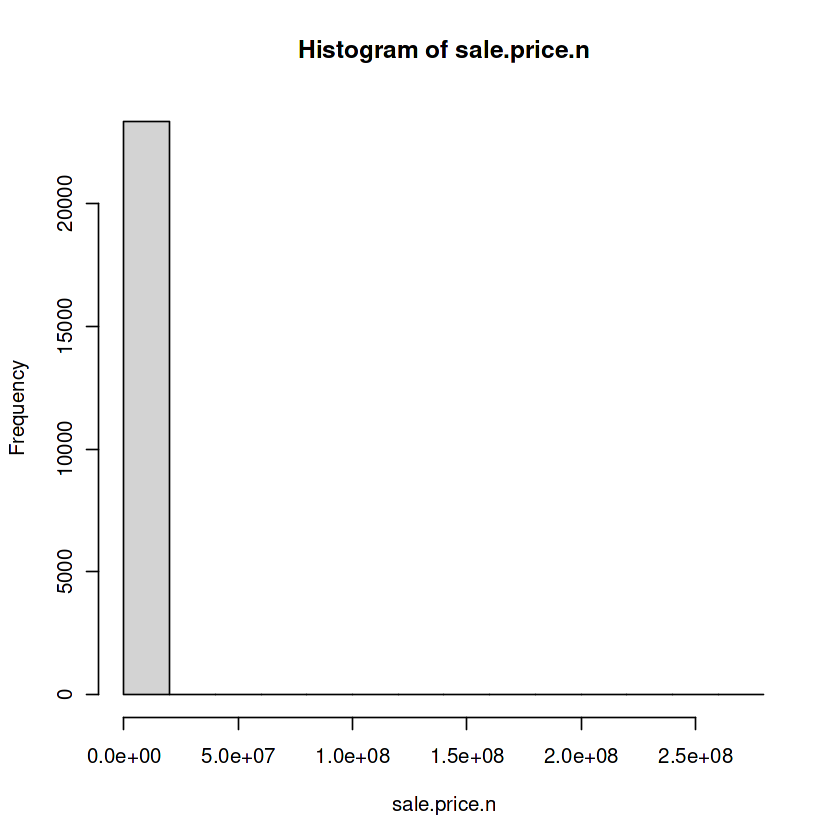

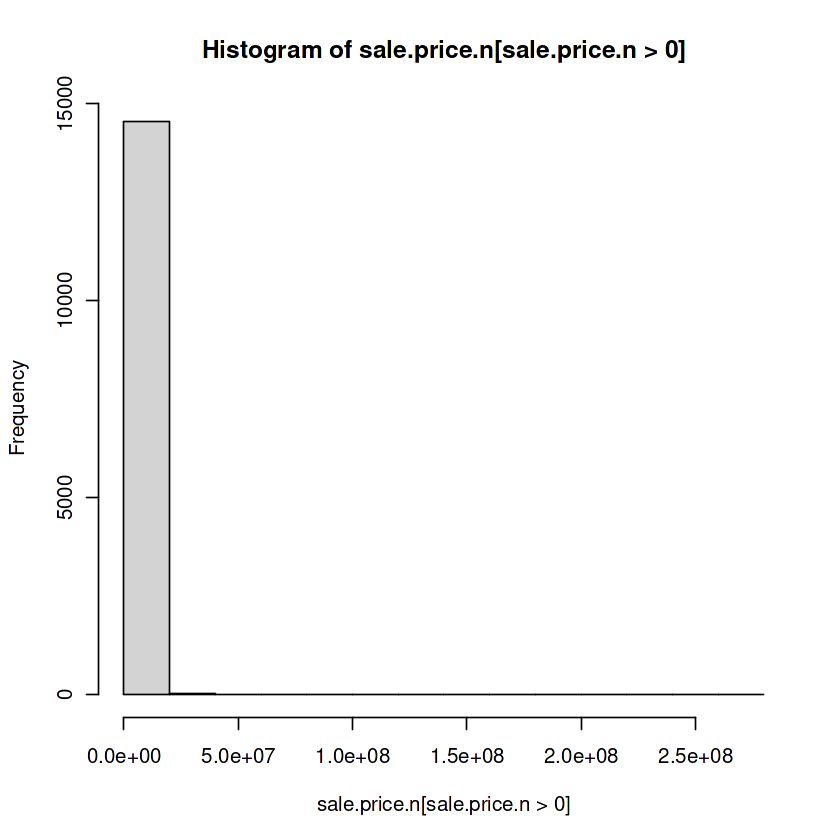

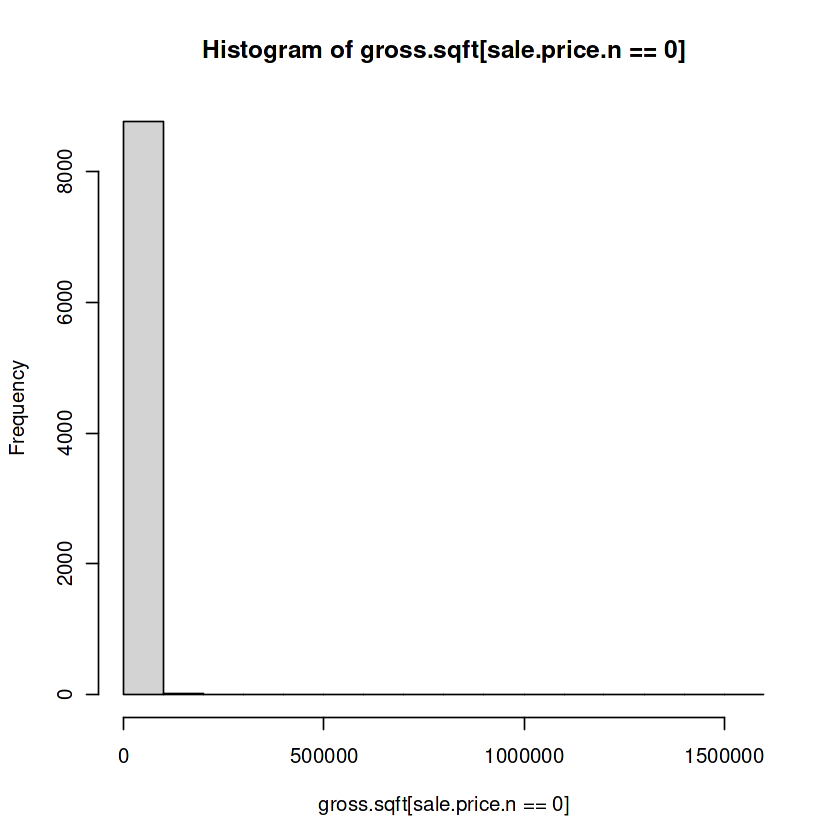

In [13]:
## do a bit of exploration to make sure there's not anything
## weird going on with sale prices
attach(bk)

hist(sale.price.n)
hist(sale.price.n[sale.price.n>0])
hist(gross.sqft[sale.price.n==0])

detach(bk)

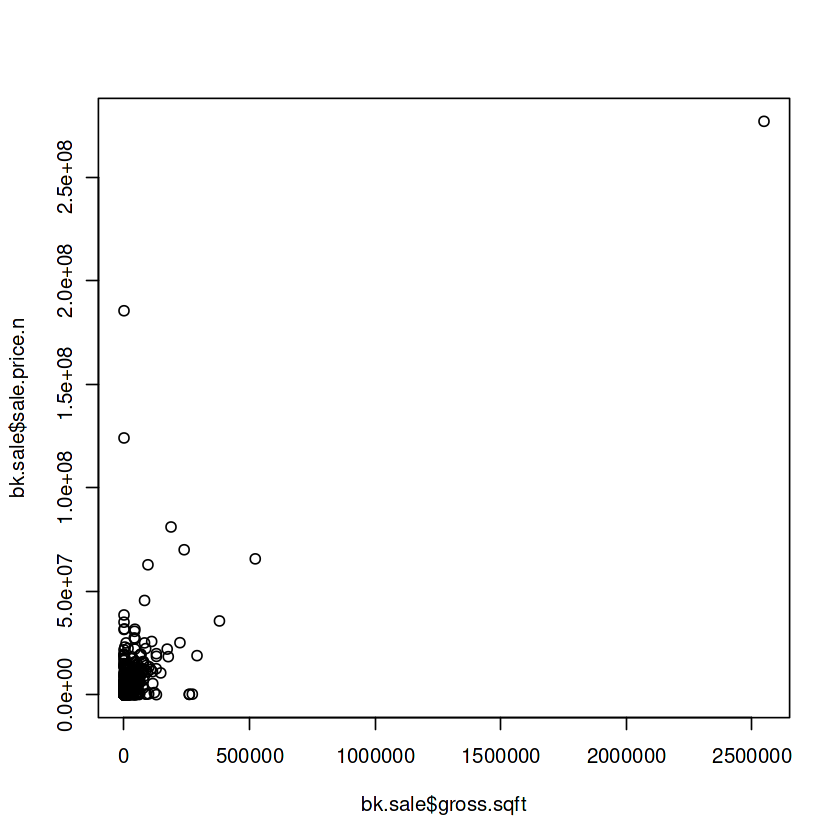

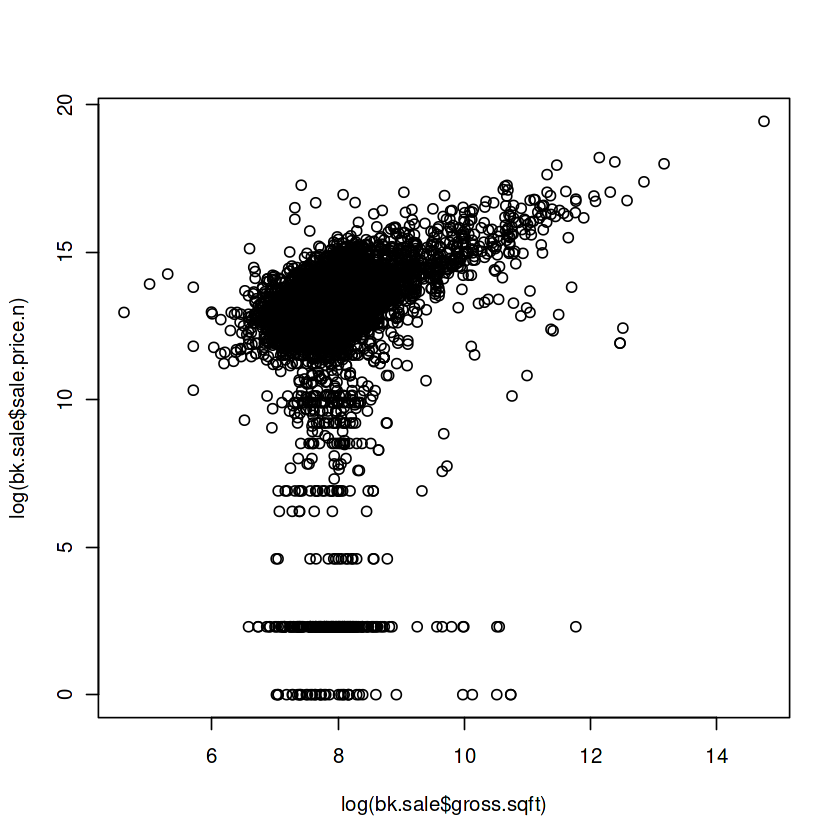

In [14]:
## keep only the actual sales
bk.sale <- bk[bk$sale.price.n!=0,]

plot(bk.sale$gross.sqft,bk.sale$sale.price.n)
plot(log(bk.sale$gross.sqft),log(bk.sale$sale.price.n))

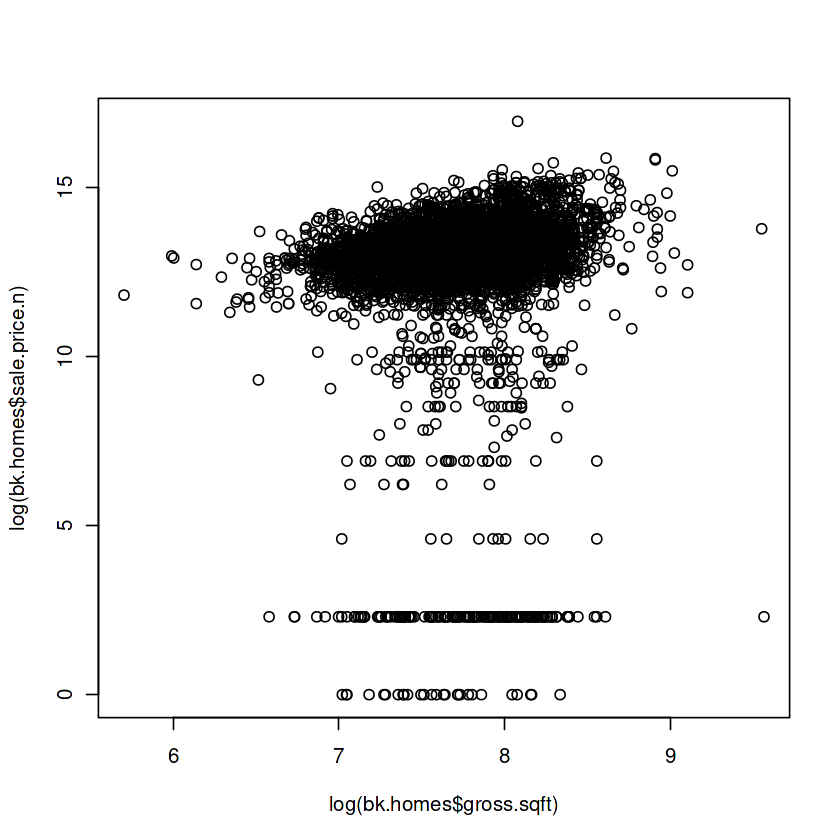

In [15]:
## for now, let's look at 1-, 2-, and 3-family homes
bk.homes <- bk.sale[which(grepl("FAMILY",
            bk.sale$building.class.category)),]
plot(log(bk.homes$gross.sqft),log(bk.homes$sale.price.n))


In [16]:
bk.homes[which(bk.homes$sale.price.n<100000),][order(bk.homes[which(bk.homes$sale.price.n<100000),]$sale.price.n),]


,borough,neighborhood,building.class.category,tax.class.at.present,block,lot,ease.ment,building.class.at.present,address,apart.ment.number,⋯,land.square.feet,gross.square.feet,year.built,tax.class.at.time.of.sale,building.class.at.time.of.sale,sale.price,sale.date,sale.price.n,gross.sqft,land.sqft
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>
1201,3,BEDFORD STUYVESANT,01 ONE FAMILY HOMES,1,1706,23,NA,A5,33 HATTIE JONES COURT,,⋯,"2,173","1,452",1985,1,A5,$1,2012-08-24,1,1452,2173
1451,3,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,1,1678,40,NA,B3,568 MAC DONOUGH STREET,,⋯,"1,800","2,592",1899,1,B3,$1,2013-02-08,1,2592,1800
2870,3,BENSONHURST,01 ONE FAMILY HOMES,1,6170,78,NA,A9,1627 71ST STREET,,⋯,"1,742","1,569",1935,1,A9,$1,2012-11-05,1,1569,1742
2937,3,BENSONHURST,02 TWO FAMILY HOMES,1,5561,52,NA,B2,1865 67TH STREET,,⋯,"3,000","2,064",1920,1,B2,$1,2012-12-19,1,2064,3000
3155,3,BENSONHURST,03 THREE FAMILY HOMES,1,5562,4,NA,C0,6613 19TH AVENUE,,⋯,"3,000","2,394",1930,1,C0,$1,2013-04-18,1,2394,3000
5631,3,BROWNSVILLE,01 ONE FAMILY HOMES,1,3541,138,NA,A5,216 BRISTOL STREET,,⋯,"1,800","1,148",1986,1,A5,$1,2012-10-25,1,1148,1800
5949,3,BUSHWICK,02 TWO FAMILY HOMES,1,3273,47,NA,B3,613 VAN BUREN,,⋯,"1,667","1,920",1901,1,B3,$1,2013-03-05,1,1920,1667
5969,3,BUSHWICK,02 TWO FAMILY HOMES,1,3296,105,NA,B2,341 EVERGREEN AVENUE,,⋯,"2,133","3,216",1996,1,B2,$1,2012-12-13,1,3216,2133
6900,3,CANARSIE,02 TWO FAMILY HOMES,1,4748,22,NA,B1,145 EAST 88TH STREET,,⋯,"3,500","1,624",1940,1,B1,$1,2013-01-22,1,1624,3500


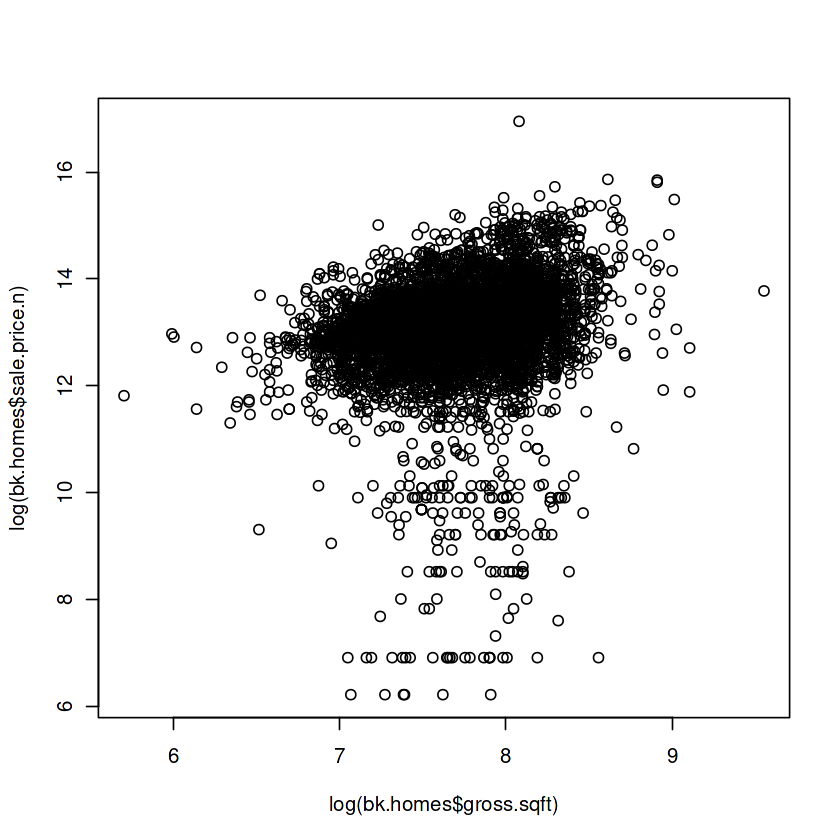

In [17]:
## remove outliers that seem like they weren't actual sales
bk.homes$outliers <- (log(bk.homes$sale.price.n) <=5) + 0
bk.homes <- bk.homes[which(bk.homes$outliers==0),]

plot(log(bk.homes$gross.sqft),log(bk.homes$sale.price.n))

In [19]:
# added by Noe to save Ben's output...
write.csv(bk.homes, "/kaggle/working/Bens NB BRKLNY OP.csv")